<a href="https://colab.research.google.com/github/priyamvadatiwari/kaggledatasets-Airquality/blob/main/Kaggle-Amazontop1000products_Priyamvada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.subplots as subplots
import seaborn as sns
import plotly.express as px

os.environ['KAGGLE_CONFIG_DIR'] = '/content'

**Introduction**
Here, we are going to analyse/visualize the data from Amazon Dataset about 10,000 Best products on Amazon. We will observe if the dataset has missing values, if data has redundant information. 

In [ ]:
!kaggle kernels output elakapoor/amazon-amazing-products -p /path/to/dest

Kernel log downloaded to /path/to/dest/amazon-amazing-products.log 


In [ ]:
!chmod 600 /content/kaggle.json
!chmod 600 /content/Amazon_Products.csv

In [ ]:

df = pd.read_csv('Amazon_Products.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,7,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,2

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,...,Unnamed: 885,Unnamed: 886,Unnamed: 887,Unnamed: 888,Unnamed: 889,Unnamed: 890,Unnamed: 891,Unnamed: 892,Unnamed: 893,Unnamed: 894
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5,15.0,1.0,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2.0,1.0,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2,17.0,2.0,3.9,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1.0,2.0,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3.0,2.0,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Columns: 895 entries, uniq_id to Unnamed: 894
dtypes: float64(2), object(893)
memory usage: 68.3+ MB


In [ ]:
selection = df[['product_name', 'manufacturer', 'price', 'number_available_in_stock','number_of_answered_questions','number_of_reviews', 'average_review_rating','description']]
selection.head()

,product_name,manufacturer,price,number_available_in_stock,number_of_answered_questions,number_of_reviews,average_review_rating,description
0,Hornby 2014 Catalogue,Hornby,£3.42,5,1.0,15.0,4.9,Product Description Hornby 2014 Catalogue Box ...
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,1.0,2.0,4.5,Size Name:Large FunkyBuys® Large Christmas Hol...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2,2.0,17.0,3.9,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,2.0,1.0,5.0,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,2.0,3.0,4.7,Product Description Hornby RailRoad 0-4-0 Gild...


In [ ]:
selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   product_name                  10002 non-null  object 
 1   manufacturer                  9995 non-null   object 
 2   price                         8567 non-null   object 
 3   number_available_in_stock     7500 non-null   object 
 4   number_of_answered_questions  9237 non-null   object 
 5   number_of_reviews             9982 non-null   float64
 6   average_review_rating         9984 non-null   object 
 7   description                   9351 non-null   object 
dtypes: float64(1), object(7)
memory usage: 625.6+ KB


In [ ]:
selection.isnull()

,product_name,manufacturer,price,number_available_in_stock,number_of_answered_questions,number_of_reviews,average_review_rating,description
0,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False
4,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...
10003,False,False,False,False,False,False,False,False
10004,False,False,False,True,False,False,False,True
10005,False,False,False,False,False,False,False,False
10006,False,False,False,False,False,False,False,False


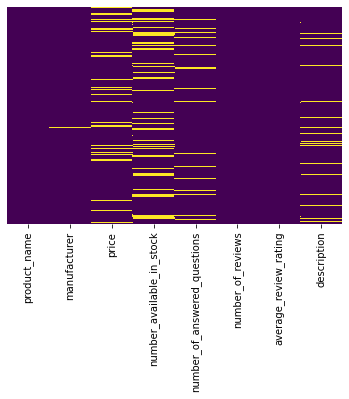

In [ ]:
sns.heatmap(selection.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Some of the columns have missing data. The proportion of missing data is fairly small and can be replaced with some form of imputation. 


In [ ]:
selection['number_available_in_stock'] = selection['number_available_in_stock'].fillna(0)
selection['price'] = selection['price'].replace(np.nan, '0')
selection['description'] = selection['description'].replace(np.nan, '0')
selection['manufacturer'] = selection['manufacturer'].replace(np.nan, 'NA')
selection['number_of_reviews'] = selection['number_of_reviews'].replace(np.nan, '0')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
selection.head(150)

,product_name,manufacturer,price,number_available_in_stock,number_of_answered_questions,number_of_reviews,average_review_rating,description
0,Hornby 2014 Catalogue,Hornby,£3.42,5,1.0,15.0,4.9,Product Description Hornby 2014 Catalogue Box ...
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,0,1.0,2.0,4.5,Size Name:Large FunkyBuys® Large Christmas Hol...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2,2.0,17.0,3.9,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,0,2.0,1.0,5.0,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,0,2.0,3.0,4.7,Product Description Hornby RailRoad 0-4-0 Gild...
...,...,...,...,...,...,...,...,...
145,Preiser 30468 Horse Drawn Open Farm Cart,Preiser,£20.21,4,2.0,1.0,5.0,Suitable for the following scale(s): HO Scale
146,Plarail - S-24 Series 485 Limited Express Trai...,Takara Tomy,£11.08,38,2.0,1.0,5.0,Batteries sold separately: AA x 1
147,Corgi 1:120 Scale Rail Legends 'Silver Link' A...,Corgi,£32.70,4,2.0,5.0,5.0,Product Description LNER 2509 was the first of...
148,Hornby Gauge Sentinel Barabel Locomotive,Hornby,£51.53,4,2.0,1.0,5.0,Product Description 'Barabel' 0-4-0 Sentinel. ...


In [ ]:
#Create a subset to see the items that are under £10.00

selection.price = [x.strip('£') for x in selection.price]
# selection['number_available_in_stock'].str.replace(' new','')


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
selection.head(300)

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,average_review_rating,description
0,Hornby 2014 Catalogue,Hornby,3.42,5,15.0,4.9,Product Description Hornby 2014 Catalogue Box ...
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,0,2.0,4.5,Size Name:Large FunkyBuys® Large Christmas Hol...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17.0,3.9,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,0,1.0,5.0,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,0,3.0,4.7,Product Description Hornby RailRoad 0-4-0 Gild...
...,...,...,...,...,...,...,...
295,TY Orient the Cat Beanie Baby,TY~BEANIES CATS,14.95,3,1.0,5.0,TY Orient the Cat Beanie Baby
296,Koala Bear Soft Toy 20cm (RB440),Dowman,8.49,8,26.0,4.4,"Quality soft, cute and cuddly koala soft toy b..."
297,Plush Soft Toy White Lamb by Hansa. 18cm. 4562,Hansa,14.99,11,2.0,5.0,Ref: 4562 Desc: White Lamb 18cm
298,Be My Bear Teddy Bear Passport,Be My Bear,3.99,0,1.0,5.0,Make a bear anywhere passport! Take your teddy...


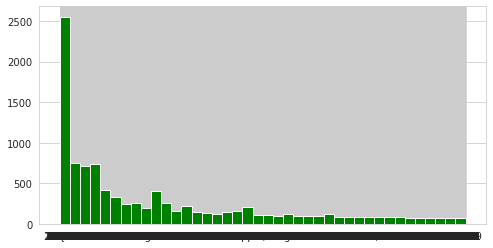

In [ ]:
selection['price'].hist(color='green',bins=40,figsize=(8,4))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


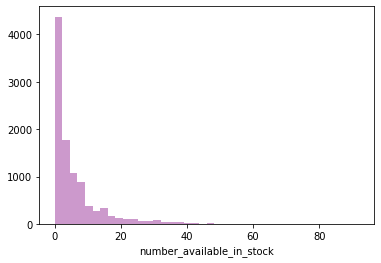

In [ ]:
sns.distplot(selection['number_available_in_stock'].dropna(),kde=False,color='purple',bins=40)

Summary: The data that we have analyzed was about 10,000 Best products on Amazon. This data was not very clean and it needed a lot of cleaning and manupulation. It was tedius to get any visualization for any particular columns since the data was not clean. 

However, I was able to see the price range, highest and lowest prices of the products, I was able to see how many products have most number of reviews. 

I was able to manupulate some of the columns which I have used during my analysis. 